In [1]:
@info pwd()
import Pkg.activate as pactivate
pactivate("../")
using Plots, Statistics, DelimitedFiles, Unitful
pyplot()

[ Info: /Users/jun/codes/SPM.jl/example
  Activating project at `~/codes/SPM.jl`


Plots.PyPlotBackend()

In [2]:
include("../src/SPM.jl")

Main.SPM

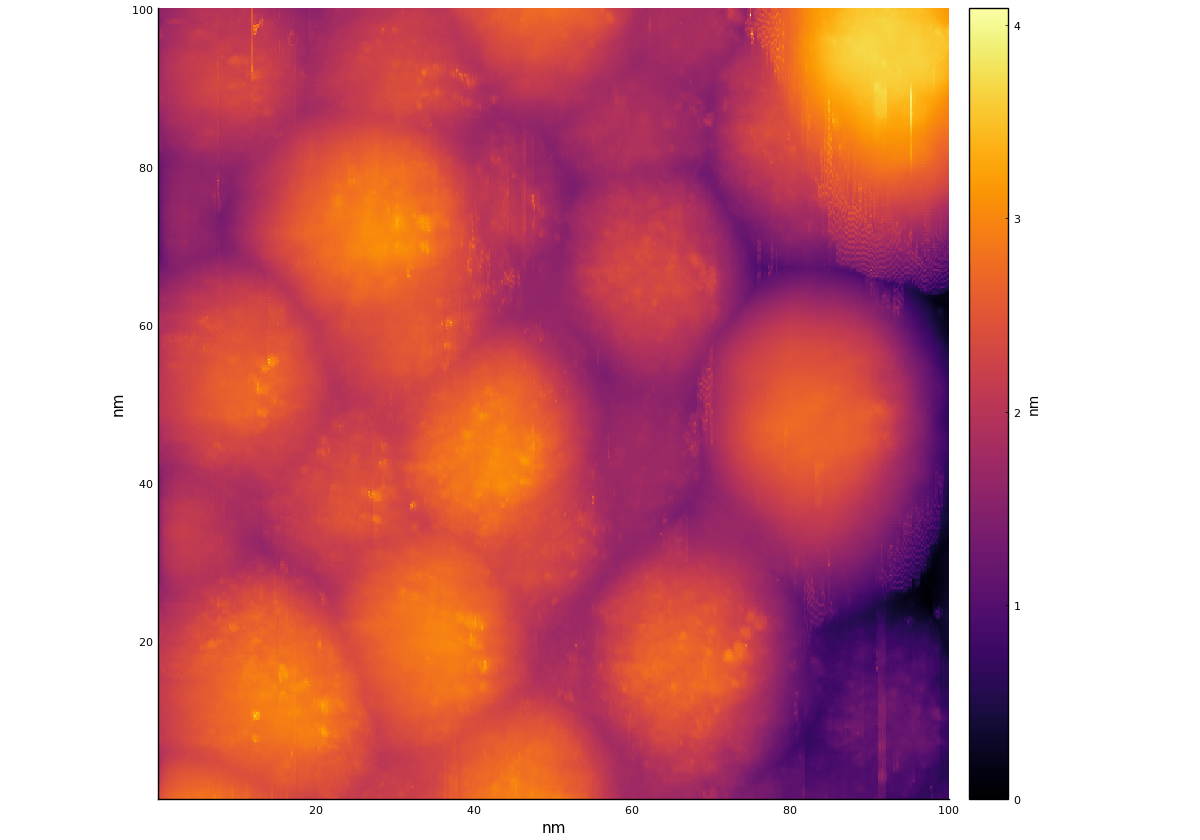

In [3]:
B3446 = SPM.HDR.loadHDR("./data/B3446.hdr")
p = SPM.Plot.heatmap(B3446; legend=true)
p = plot!(p, size=(1200, 840))

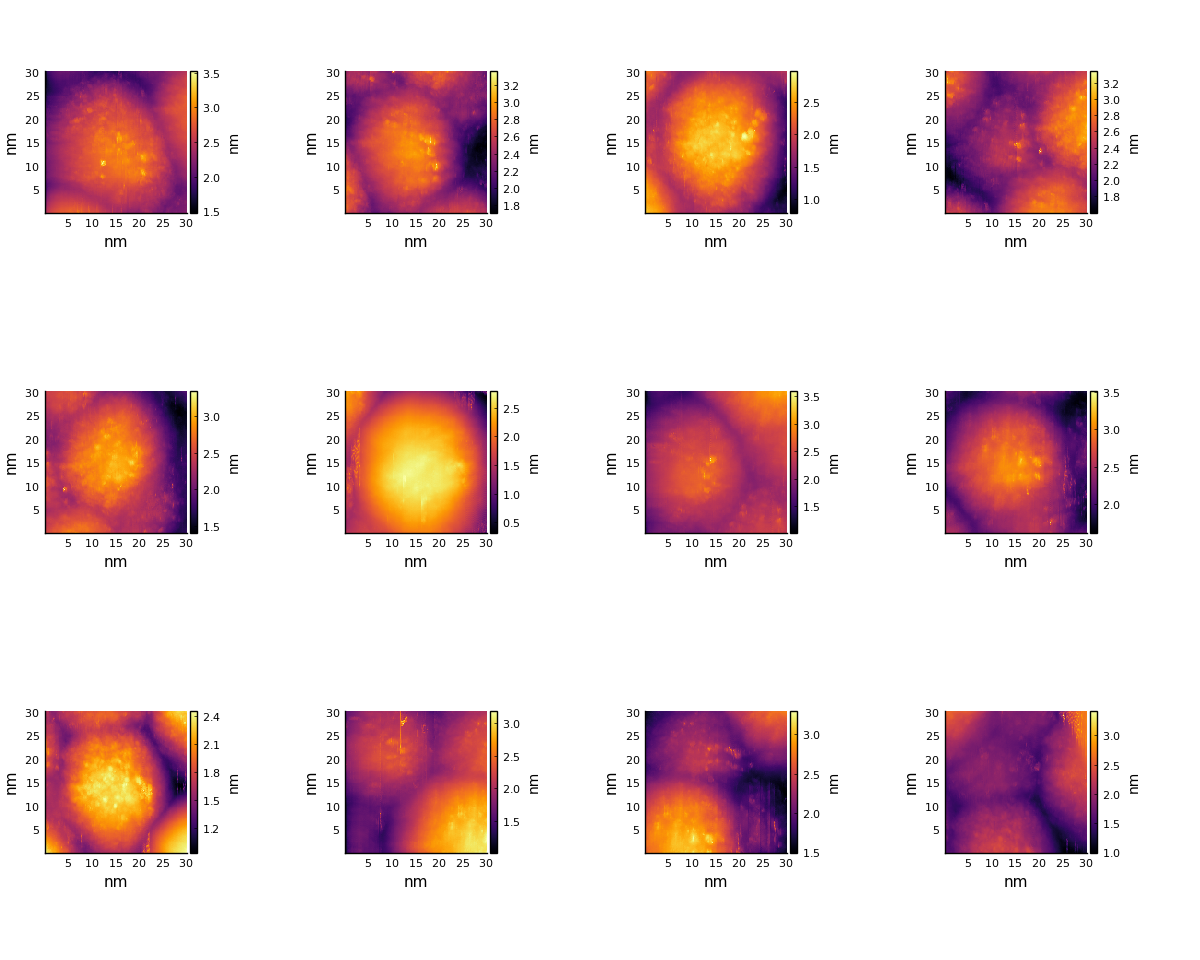

In [4]:
xy2ij(xy) = (1+round(Integer, xy[1]*511/100), 1+round(Integer, xy[2]*511/100))
im_size = xy2ij((30, 30))
lowerleft = xy2ij.([
    (0,0), (22,7), (51,2), (12, 24),
    (28, 28), (67,35), (0, 40), (14, 58),
    (48, 53), (0, 70), (20, 70), (50, 68)
])
B3446_extractions = SPM.extract(B3446, lowerleft, im_size)
plots = [SPM.Plot.heatmap(im) for im in B3446_extractions]
p = plot(plots..., layout=(3, 4), size=(1200, 960))

In [5]:
size(B3446_extractions[1].data)

(154, 154)

In [ ]:
max_epoch = 500
lambdas = [0.001*1.5^(i) for i = 0:11]
@time results = SPM.BTR.solveDifferentiableBTR(
    B3446_extractions, 100, max_epoch, lambdas; debug_interval=100
)
SPM.BTR.saveResults(B3446_extractions, results, "./B3446_BTR")

[ Info: 1th thread : start solving for lambda = 0.001
[ Info: 4th thread : start solving for lambda = 0.011390625
[ Info: 2th thread : start solving for lambda = 0.003375
[ Info: 3th thread : start solving for lambda = 0.038443359375
[ Info: 1th thread : optimizer setup completed
[ Info: 3th thread : optimizer setup completed
[ Info: 4th thread : optimizer setup completed
[ Info: 2th thread : optimizer setup completed
[ Info: 2th thread : 100th epoch completed in 9801.019 sec
[ Info: 4th thread : 100th epoch completed in 10123.595 sec
[ Info: 3th thread : 100th epoch completed in 10125.157 sec
[ Info: 2th thread : 100th epoch completed in 10150.975 sec
[ Info: 4th thread : 200th epoch completed in 28556.211 sec
[ Info: 2th thread : 200th epoch completed in 28568.516 sec
[ Info: 2th thread : 200th epoch completed in 28600.411 sec
[ Info: 3th thread : 200th epoch completed in 28612.612 sec


In [ ]:
p = plot(title="loss vs. lambdas", xlabel="epochs", ylabel="loss [nm^2]")
for result in results
    p = plot!(collect(1:result.max_epoch), result.loss_history, label="lambda=$(result.lambda)")
end
p